# Graph colouring
---

#### Problem:

> Generate *all* proper colourings for the given graph in polynomial time

---

In [1]:
import json
import random

import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
%matplotlib inline

---

#### Data is a csv file representing edges of the graph with header: `'from', 'to'`

```
| idx: int | from: str | to: str  |
|    ---   |    ---    |    ---   |
```

## Preprocessing step from the original data

In [3]:
with open("data_raw/data.orig.json", 'r') as f:
    data = json.load(f)

edge_dict = data['biedges']
edges = pd.DataFrame(edge_dict).drop(['controlX', 'controlY'], axis=1)

In [4]:
net = nx.Graph()  # create graph

net.add_edges_from(edges.values)  # add edges

/home/macermak/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


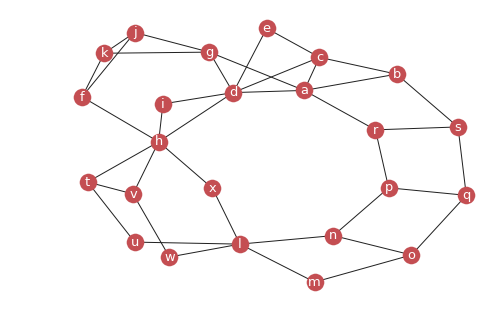

In [5]:
nx.draw_kamada_kawai(net,
#                      node_color=[deg for _, deg in net.degree()],  # colour by degree
                     labels={vid: vid for vid in list(net)},
                     font_color='w', font_size=13)

---

## Ops

---

In [6]:
from collections import OrderedDict

def DFS(g, start_vertex):

    stack, visited = [start_vertex], OrderedDict()
    
    parent = None
    while stack:
        name = stack.pop()
        
        visited[name] = True
        
        stack.extend([v_n for v_n in g[name] if v_n not in visited])
        
    return list(visited)

In [7]:
def get_graph_colourings(g, n_colours) -> list:
    """Return list of proper graph colourings."""
    fun_calls = 0  # [DEBUG]
    
    colours = list(range(0, n_colours))
    colouring = {
        v_id: None for v_id in g
    }
    
    v_dmax, _ = max(g.degree(), key=lambda t: t[1])
    dfs_tree = DFS(g, v_dmax)
    
    def _get_graph_colurings(vertices):
        """Auxiliary."""
        nonlocal fun_calls
        fun_calls += 1
        
        if not vertices:
            
            yield list(colouring.values())
        
        else:
            v = vertices[0]

            for col in colours:

                permit = True
                for v_n in g[v]:
                    if col == colouring[v_n]:
                        permit = False
                        break
                
                if permit:
                    colouring[v] = col

                    yield from _get_graph_colurings(vertices[1:])

            colouring[v] = None
    
    graph_colourings = list(_get_graph_colurings(dfs_tree))
    print(f"Number of calls: {fun_calls}")  # [DEBUG]
    
    return graph_colourings

---

### [TEST] Simple path

In [8]:
test_edges = 'abc'  # should be 3*2*2 = 12 colourings

g_test = nx.Graph()
g_test.add_edges_from(
   zip(test_edges, test_edges[1:])
)

In [9]:
%%time
n = 3
graph_colorings = list(get_graph_colourings(g_test, n))

if graph_colorings:
    print(f"Number of colorings: {len(graph_colorings)}")
else:
    print(f"Graph could not be colored with {n} colors.")

Number of calls: 22
Number of colorings: 12
CPU times: user 2.36 ms, sys: 188 µs, total: 2.55 ms
Wall time: 7.6 ms


In [10]:
assert len(graph_colorings) == 12

/home/macermak/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


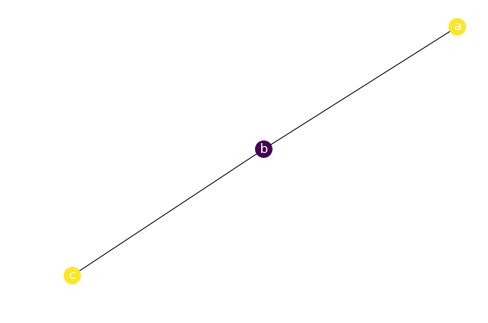

In [11]:
# pick other random coloring
col_idx = random.randint(0, len(graph_colorings) - 1)

nx.draw_kamada_kawai(g_test,
                     node_color=list(graph_colorings[col_idx]),
                     labels={
                         vid: vid for vid in g_test
                     },
                     font_color='w', font_size=13)

### [ASSIGNMENT]

In [12]:
edge_subset: int = None  # creates induce subgraph over number of edges (for faster computation when developping)
g = net.edge_subgraph(map(tuple, edges.values[:edge_subset]))

In [13]:
%%time
n = 3
graph_colorings = list(get_graph_colourings(g, n))

if graph_colorings:
    print(f"Number of colorings: {len(graph_colorings)}")
else:
    print(f"Graph could not be colored with {n} colors.")

Number of calls: 66388
Number of colorings: 3888
CPU times: user 1.07 s, sys: 916 µs, total: 1.07 s
Wall time: 1.08 s


/home/macermak/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


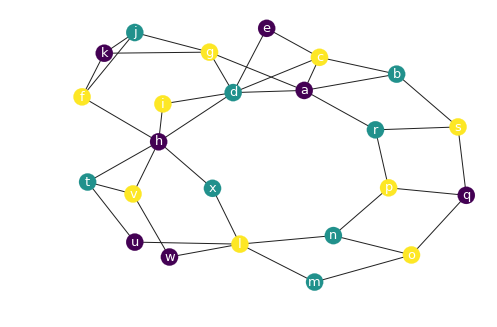

In [14]:
# pick random coloring
col_idx = random.randint(0, len(graph_colorings) - 1)  # set to 0 for minimal colouring

nx.draw_kamada_kawai(g,
                     node_color=list(graph_colorings[col_idx]),
                     labels={
                         vid: vid for vid in g
                     },
                     font_color='w', font_size=13)

---